In [1]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import plotly as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as mplt
from PIL import Image
import requests
from io import BytesIO
init_notebook_mode()

In [2]:
#reading the dataset
webSeries = pd.read_csv('data.csv')
webSeries.head()

Series Title  Year Released Content Rating  R Rating  \
0     Breaking Bad           2008            18+       100   
1  Game of Thrones           2011            18+        99   
2   Rick and Morty           2013            18+        97   
3  Stranger Things           2016            16+        96   
4         The Boys           2019            18+        95   

                       Genre  \
0                Crime,Drama   
1   Action & Adventure,Drama   
2           Animation,Comedy   
3              Drama,Fantasy   
4  Action & Adventure,Comedy   

                                         Description No of Seasons  \
0  When Walter White, a New Mexico chemistry teac...      5Seasons   
1  Seven noble families fight for control of the ...      8Seasons   
2  Rick is a mentally-unbalanced but scientifical...      4Seasons   
3  When a young boy vanishes, a small town uncove...      3Seasons   
4  A group of vigilantes known informally as “The...      2Seasons   

           Streaming Platform  
0                     Netflix  
1                 HBO MAX,HBO  
2  Free Services,HBO MAX,Hulu  
3                     Netflix  
4                 Prime Video

In [4]:
print(f'Il y a {webSeries.shape[0]} séries TV dans cet ensemble de données')

Il y a 12353 séries TV dans cet ensemble de données


Nous avons, à notre disposition 
- Le **titre** de la série
- La **année** de sa sortie
- La **notation du contenu** de la série
- La notation **Rotten Tomatoes**.
- Les **Genres** auxquels elle appartient. Ici, une même web-série peut appartenir à plusieurs genres. Par exemple, Breaking Bad appartient à la fois au genre policier et au genre dramatique. 
- Une courte **description** de ce dont parle la série.
- Le nombre de **saisons** où la web-série a été diffusée.
- Les **plateformes de diffusion** où l'on peut regarder la série. Il s'agit là aussi d'une liste de valeurs. Ainsi, la même série peut être disponible sur plusieurs plateformes différentes. 

In [5]:

webSeries['Content Rating'] = webSeries['Content Rating'].fillna('-1')
webSeries['Streaming Platform'] = webSeries['Streaming Platform'].fillna('-1')

# <center> Les séries au fil des ans <center>

Nous savons pertinemment que les séries sont devenues un moyen de divertissement très répandu. 

Cependant, ce n'est qu'après avoir examiné le graphique ci-dessous que nous réalisons à quel point leur popularité a augmenté rapidement. 

In [6]:

moviesReleasedEachYear = webSeries['Year Released'].value_counts().sort_index()
cumsumMoviesReleased = webSeries['Year Released'].value_counts().sort_index().cumsum()

trace1 = go.Bar(x = list(moviesReleasedEachYear.index), y = list(moviesReleasedEachYear.values),name = 'Série publiée chaque année')
trace2 = go.Scatter(x = list(cumsumMoviesReleased.index), y = list(cumsumMoviesReleased.values), mode='lines',name = 'Ligne de tendance du nombre de séries')

fig = plt.subplots.make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1, secondary_y=False)
fig.add_trace(trace2, secondary_y=True)

fig.update_layout(template = 'plotly_white',margin=dict(l=80, r=80, t=25, b=10),
                  title = { 'text' : '<b>Les séries au fil des années</b>', 'x' : 0.5},
                 font_family = 'Fira Code',title_font_color= '#ff0d00', showlegend = False)
fig.show()

C'est vers 2003-2004 que nous constatons une augmentation du nombre de séries Web produites chaque année. 

### Rien qu'en 2017, près de 1300 séries ont été produites !

# <center> Ratings <center>

In [7]:
fig = px.scatter(webSeries[(webSeries['R Rating'] != -1) & (webSeries['Content Rating'] != '-1')], x = 'Year Released',
                 y = 'R Rating', facet_col = 'Content Rating', trendline = 'ols', opacity=0.7)
fig.update_layout(template = 'plotly_dark',
                  title = { 'text' : '<b>Classement du contenu et classement de Rotten Tomatoes</b>', 'x' : 0.5},
                 font_family = 'Fira Code',title_font_color= '#72bcd4', showlegend = False)
fig.show()

* Nous constatons une tendance positive dans le classement Rotten Tomatoes des émissions classées 18+ au fil des ans. Il semble que la vulgarité et le blasphème soient devenus plus acceptables dans les séries au fil des ans.

* Une autre chose qui mérite d'être notée est la façon dont le groupe est légèrement plus faible lorsque le classement du contenu est tout par rapport au classement du contenu des séries 18+.


# Series et Genres

In [8]:
initial_cols = webSeries.columns 

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
webSeries['GenreList'] = webSeries['Genre'].apply(lambda x: [y.strip() for y in x.split(',')])

mlb.fit(webSeries['GenreList'])

webSeries[mlb.classes_] = mlb.transform(webSeries['GenreList'])

In [9]:

print(f'The listed genres are {mlb.classes_}')

The listed genres are ['-1' '1901' '1904' '1931' '1943' '1945' '1947' '1948' '1949' '1950'
 '1951' '1952' '1953' '1954' '1955' '1956' '1957' '1958' '1959' '1960'
 '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969' '1970'
 '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980'
 '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990'
 '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019' '2020'
 'A&E' 'AMC' 'AcornTV' 'Action & Adventure' 'Animation' 'Anime'
 'Apple TV+' 'BET' 'BET+' 'Biography' 'Bravo' 'BritBox' 'CBS All Access'
 'Children' 'Cinemax' 'Comedy' 'Comedy Central' 'Crime' 'Cult'
 'DC Universe' 'DIY' 'Disney' 'Disney+' 'Documentary' 'Drama' 'FOX' 'FYI'
 'Family' 'Fantasy' 'Food' 'Food Network' 'Free Services' 'Funimation'
 'Game Show' 'HBO' 'HBO MAX' 'HGTV' 'History' 'Home & Garden' 'Hoop

In [11]:

selected_genres = ['Action & Adventure', 'Animation','Anime','Biography','Children','Comedy','Crime','Cult','DIY', 'Documentary',
                      'Drama','Family','Fantasy','Food','Game Show','History','Home & Garden','Horror',
                      'Lifetime','Musical','Mystery','Pet','Reality','Romance','Science','Science-Fiction','Showtime', 'Sport',
                      'Stand-up & Talk','Thriller','Travel']
selected_cols = list(initial_cols)
selected_cols.extend(selected_genres) 
webSeries = webSeries[selected_cols]

In [12]:
seriesPerCategory = webSeries[selected_genres].apply(sum, axis = 0) 


colors = ['lightslategray',] * len(selected_genres)
"""
Les indices utilisés correspondent à différents genres identifiés à partir de la liste selected_genres.
0 -> Action et aventure
1 -> Animation
5 -> Comédie
9 -> Documentaire
10 -> Drame
22 -> Réalité
"""
for idx in [0,1,5,9,10,22]:
    colors[idx] = 'slateblue'
    

trace = go.Bar(x = seriesPerCategory.index, y = seriesPerCategory.values,marker_color = colors)
fig = go.Figure([trace])
fig.update_layout(template = 'plotly_white',
                  title = { 'text' : '<b>Nombre de séries dans chaque genre</b>', 'x' : 0.5},
                  font_family = 'Fira Code',title_font_color= '#72bcd4', 
                  showlegend = False)
fig.show()

Nous pouvons constater qu'il existe de nombreux genres dans lesquels les séries sont classées. Il est également évident que certains genres sont plus populaires que d'autres. 

Nous voyons qu'en termes de nombre de Séries, les 6 premiers genres sont les suivants

1. Drame
2. Comédie
3. Documentaire
4. Animation
5. Action et aventure
6. Réalité

# <center> Ratings et Genre <center>

In [13]:
overall_mean_r = webSeries[webSeries['R Rating'] != -1]['R Rating'].mean()

In [14]:
mean_r_rating = {}

colors_r = ['lightslategray'] * len(selected_genres)

for i,genre in enumerate(selected_genres):

    mean_r_rating[genre] = webSeries[(webSeries[genre] == 1 )& (webSeries['R Rating'] != -1)]['R Rating'].mean()
    
    if(mean_r_rating[genre] > overall_mean_r):
        colors_r[i] = 'rosybrown'

Les barres colorées sont celles dont l'évaluation est supérieure à la moyenne.

In [17]:

fig = plt.subplots.make_subplots(rows = 1, cols = 1,
                                 horizontal_spacing=0.15, 
                                 subplot_titles=['Rotten Tomatoes Rating'])



trace_r = go.Bar(x = list(mean_r_rating.values()), y = list(mean_r_rating.keys()),
                 name = "Classemement moyen de Rotten Tomatoes", orientation = 'h', 
                 marker_color = colors_r)


trace_mean_r = go.Scatter(y = list(mean_r_rating.keys()), x = [overall_mean_r]*len(mean_r_rating), 
                          name = 'Note moyenne globale de Rotten Tomatoes',
                          mode = 'lines', line = {'color' : '#ffb6c1'})


fig.add_trace(trace_r, row = 1, col = 1)
fig.add_trace(trace_mean_r, row = 1, col = 1)

fig.update_layout(template = 'plotly_white',
                  height = 800, margin=dict(l=80, r=80, t=50, b=20),
                  title = { 'text' : '<b>Classement dans chaque genre</b>', 'x' : 0.5},
                  font_family = 'Fira Code',title_font_color= 'crimson', 
                  showlegend = False)
fig.show()

Les notes de Rotten Tomatoes sont faible pour les DIY, Showtime, Lifetime etc mais très forte en Horror, Animation, Action etc.


# Plateformes de diffusion et séries

In [18]:
mlb = MultiLabelBinarizer()
webSeries['StreamingPlatformList'] = webSeries['Streaming Platform'].apply(lambda x: [y.strip() for y in x.split(',')])
mlb.fit(webSeries['StreamingPlatformList'])
webSeries[mlb.classes_] = mlb.transform(webSeries['StreamingPlatformList'])

In [19]:
selected_streaming = list(mlb.classes_)
selected_streaming.remove('-1')
selected_streaming.remove('DIY')
selected_streaming.remove('History')
print(f'Les plateformes sont {selected_streaming}')

Les plateformes sont ['A&E', 'ABC', 'AMC', 'AMC Premiere', 'AcornTV', 'Adult Swim', 'Apple TV+', 'BBC America', 'BET', 'BET+', 'Bravo', 'BritBox', 'CBS All Access', 'CNBC', 'Cartoon Network', 'Cinemax', 'Comedy Central', 'Crunchyroll', 'DC Universe', 'Disney', 'Disney+', 'Epix', 'FOX', 'FX', 'FYI', 'Food Network', 'Free Services', 'Funimation', 'HBO', 'HBO MAX', 'HGTV', 'Hallmark', 'Hallmark Movies Now', 'Hoopla', 'Hulu', 'IFC', 'IndieFlix', 'Lifetime', 'MTV', 'NBC', 'NatGeo', 'Netflix', 'Nick', 'Peacock Premium', 'Prime Video', 'Science', 'Showtime', 'Shudder', 'Starz', 'Sundance', 'Syfy', 'TBS', 'TLC', 'TNT', 'TVLand', 'Travel Channel', 'TruTV', 'USA', 'VH1', 'Viceland', 'YouTube Premium', 'fuboTV']


In [20]:
seriesPerPlatform = webSeries[selected_streaming].apply(sum, axis = 0)
colors = ['gray'] * len(selected_streaming)
for idx in [27,33,34,41,44,61]:
    colors[idx] = '#8d81d9'
trace = go.Bar(x = seriesPerPlatform.index, y = seriesPerPlatform.values,marker_color = colors)
fig = go.Figure([trace])
fig.update_layout(template = 'ggplot2',margin=dict(l=80, r=80, t=25, b=10),
                  title = { 'text' : '<b>Nombre de séries sur chaque plateforme de streaming</b>', 'x' : 0.5},
                 font_family = 'Fira Code',title_font_color= 'blue', showlegend = False)
fig.show()

En fonction du nombre de séries disponibles sur chaque plateforme, les 6 premières plateformes de streaming après avoir ignoré les services gratuits sont les suivantes :

1. Prime Video
2. Netflix
3. Hulu
4. fuboTV
5. Hoopla
6. Funimation

In [21]:
mean_r_rating = {}
for platform in selected_streaming:
    mean_r_rating[platform] = webSeries[(webSeries[platform] == 1 )& (webSeries['R Rating'] != -1)]['R Rating'].mean()
color = ['gray']*len(selected_streaming)
for idx in [27,33,34,41,44,61]:
    color[idx] = '#8fa6bc'

In [22]:
fig = plt.subplots.make_subplots(rows = 1, cols = 1, horizontal_spacing=0.15, subplot_titles=['Rotten Tomatoes Rating'])
trace_r = go.Bar(x = list(mean_r_rating.values()), y = list(mean_r_rating.keys()), name = "Mean Rotten Tomattoes Rating", orientation = 'h', marker_color = color)
trace_mean_r = go.Scatter(y = list(mean_r_rating.keys()), x = [overall_mean_r]*len(mean_r_rating), name = 'Overall Mean Rotten Tomatoes Rating',mode = 'lines')
fig.add_trace(trace_r, row = 1, col = 1)
fig.add_trace(trace_mean_r, row = 1, col = 1)
fig.update_layout(template = 'plotly_white',height = 1000,margin=dict(l=80, r=80, t=50, b=20),
                  title = { 'text' : '<b>Classement dans chaque plateforme de streaming</b>', 'x' : 0.5},
                 font_family = 'Fira Code',title_font_color= 'crimson', showlegend = False)
fig.show()

* Sur toutes les plateformes de streaming, FOX a la meilleure note moyenne Rotten Tomatoes. 
* Sur toutes les plateformes de streaming, FYI a la plus faible moyenne de Rotten Tomatoes.

In [23]:
major_platforms = ['Prime Video', 'Netflix', 'Hulu', 'fuboTV','Hoopla','Funimation']
major_genres = ['Action & Adventure', 'Animation','Comedy', 'Documentary', 'Drama', 'Reality']

In [24]:
fig = plt.subplots.make_subplots(rows = 2, cols = 3, subplot_titles = major_platforms,
                                horizontal_spacing=0.15,
                                vertical_spacing=0.2)
for i, platform in enumerate(major_platforms):
    genreCounts = {}
    for genre in major_genres:
        genreCounts[genre] = webSeries[(webSeries[genre] == 1) & webSeries[platform] == 1].shape[0]
    trace = go.Bar(y = list(genreCounts.keys()), x = list(genreCounts.values()),name = platform, orientation = 'h')
    fig.add_trace(trace, row = (i//3) + 1, col = (i%3) + 1)
fig.update_layout(showlegend = False)
fig.update_layout(template = 'presentation',
                  title = { 'text' : '<b>nombre de séries des principaux genres sur les principales plateformes de streaming</b>', 'x' : 0.5},
                 font_family = 'Fira Code',title_font_color= 'black', showlegend = False)
fig.show()

Si l'on considère ces chiffres, on peut dire que chaque plateforme de streaming se spécialise dans un ou deux des genres :

* Prime Video est doué pour les séries dramatiques et documentaires.
* Netflix est bon pour les séries dramatiques.
* Hulu est bon pour les séries dramatiques et comiques
* fuboTV est bon pour les séries documentaires et de télé-réalité.
* Hoopla, comme Prime Video, est bon pour créer des séries dramatiques et documentaires.
* Funimation est spécialisé dans les séries d'animation.

# Nous sommes de retour avec une nouvelle saison

In [25]:
def extract_num_of_seasons(seasons):
    numOfSeasons = re.findall(r'\d+', seasons)[0]
    return int(numOfSeasons)

webSeries['Seasons'] = webSeries['No of Seasons'].apply(lambda x:extract_num_of_seasons(x))

In [26]:
seasonsCounts = webSeries['Seasons'].value_counts().sort_index()
trace = go.Scatter(x = seasonsCounts.index, y = seasonsCounts.values, mode = 'lines+markers')
fig = go.Figure([trace])
fig.update_layout(template = 'presentation',
                  title = { 'text' : '<b>Nombre de séries avec un nombre donné de saisons</b>', 'x' : 0.5},
                  font_family = 'Fira Code',title_font_color= 'black',
                  xaxis_title="Nombre de saisons", yaxis_title="Nombre de séries (en échelle logarithmique)",
                  showlegend = False)
fig.update_yaxes(type="log")
fig.show()

### Le top 10 des web-séries ayant le plus grand nombre de saisons

In [29]:
webSeries.sort_values(by = 'Seasons', ascending=False)[['Series Title','Year Released','Genre','R Rating','Streaming Platform','Seasons']].head(10).reset_index(drop = True)

Series Title  Year Released                       Genre  \
0                House Hunters           1999  Reality,Action & Adventure   
1  House Hunters International           2006              Reality,Travel   
2                 Mickey Mouse           2013          Animation,Children   
3               Meet the Press           1947          1947,Free Services   
4                    Frontline           1983            Documentary,1983   
5                    Jeopardy!           1964              Game Show,1964   
6                        Today           1952          1952,Free Services   
7                      Horizon           1974            Documentary,1974   
8                      WWE Raw           1993                 Drama,Sport   
9            Coronation Street           1960               Drama,Romance   

   R Rating          Streaming Platform  Seasons  
0        63     Free Services,Hulu,HGTV      187  
1        58     Free Services,Hulu,HGTV      160  
2        55               Free Services       84  
3        43          Free Services,Hulu       82  
4        60                 Prime Video       77  
5        66         Netflix,Hulu,fuboTV       75  
6        45      Free Services,Hulu,NBC       71  
7        53                          -1       64  
8        69      Free Services,Hulu,USA       62  
9        59  Free Services,Hulu,BritBox       60

In [30]:
seasonMeanR = {}

for i in range(1,21):  
    seasonDfR = webSeries[(webSeries['Seasons'] == i) & (webSeries['R Rating'] != -1)]
    seasonMeanR[i] = seasonDfR['R Rating'].mean()

In [31]:
trace = go.Scatter(x = list(seasonMeanR.keys()), y = list(seasonMeanR.values()), mode = 'lines+markers',name = 'Rotten Tomatoes Ratings Across Season')
fig = plt.subplots.make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace, secondary_y=False)
fig.update_layout(template = 'presentation',
                  title = { 'text' : "<b>Note moyenne sur l'ensemble des saisons</b>", 'x' : 0.5},
                  font_family = 'Fira Code',title_font_color= 'black',
                  xaxis_title="Number of Seasons", 
                  showlegend = False)
fig.show()

In [32]:
seasonsAcrossGenres = {}
for genre in selected_genres:
    df = webSeries[webSeries[genre] == 1]
    seasonsAcrossGenres[genre] = int(df['Seasons'].mean())

In [33]:
colors = ['#6aaa96']*len(seasonsAcrossGenres)
fig = px.bar(pd.DataFrame({'Genre' : list(seasonsAcrossGenres.keys()), 'Nombre moyen de saisons' : list(seasonsAcrossGenres.values())}), 
             x = 'Genre',y = 'Nombre moyen de saisons', color_discrete_sequence = colors)
fig.update_layout(template = 'plotly_white',
                  title = { 'text' : '<b>Nombre moyen de saisons dans chaque genre</b>', 'x' : 0.5},
                  font_family = 'Fira Code',title_font_color= 'black',
                  showlegend = False)
fig.show()

Les émissions de voyage ont le nombre moyen de saisons le plus élevé, suivies des émissions de bricolage et de maison et jardin. 

Parmi les principaux genres, on constate que les séries Web de télé-réalité ont le nombre moyen de saisons le plus élevé.

# Que disent les descriptions ? 

In [34]:
webSeries['Description'] = webSeries['Description'].apply(lambda x: str(x).lower())

In [35]:
stopwords = set(STOPWORDS).union(set(['episode','episodes','season','seasons','one', 'imdb']))
def createCorpus(genre):
    df = webSeries[webSeries[genre] == 1]
    corpus = ""
    for des in df['Description'].to_list():
        corpus += des[:100]
    return corpus

def generateWordCloud(genre, mask = None):
    mplt.subplots(figsize=(12,8))
    corpus = createCorpus(genre)
    wordcloud = WordCloud(background_color='White',
                          mask = mask,
                          contour_color='orange', contour_width=4, 
                          stopwords=stopwords,
                          width=1500, margin=10,
                          height=1080
                         ).generate(corpus)
    mplt.imshow(wordcloud)
    mplt.axis('off')
    mplt.show()

### Action and Adventure

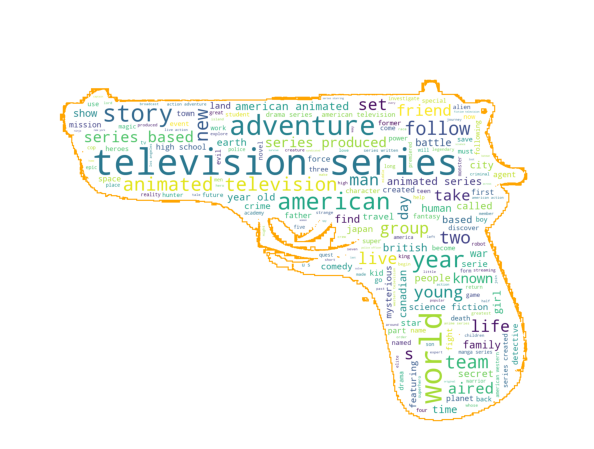

In [36]:
response = requests.get('https://bloximages.newyork1.vip.townnews.com/richmond.com/content/tncms/assets/v3/editorial/3/a1/3a10b759-1565-5ddc-8360-e9e084c6d575/5f29df8acaff3.image.jpg?crop=1643%2C1232%2C19%2C0&resize=1643%2C1232&order=crop%2Cresize')
img = Image.open(BytesIO(response.content))
generateWordCloud('Action & Adventure', mask = np.asarray(img))

### Animation

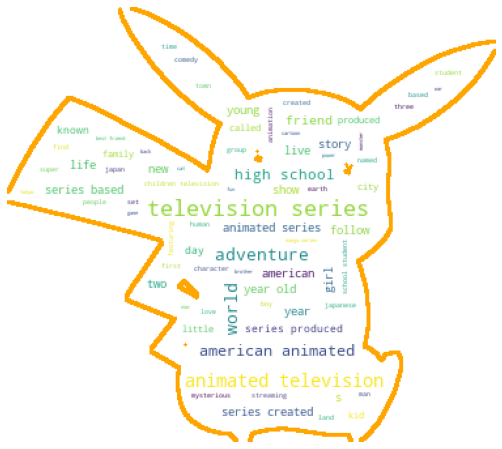

In [37]:
response = requests.get('https://i.pinimg.com/originals/76/47/9d/76479dd91dc55c2768ddccfc30a4fbf5.png')
img = Image.open(BytesIO(response.content))
generateWordCloud('Animation',mask = np.asarray(img))

### Comedy

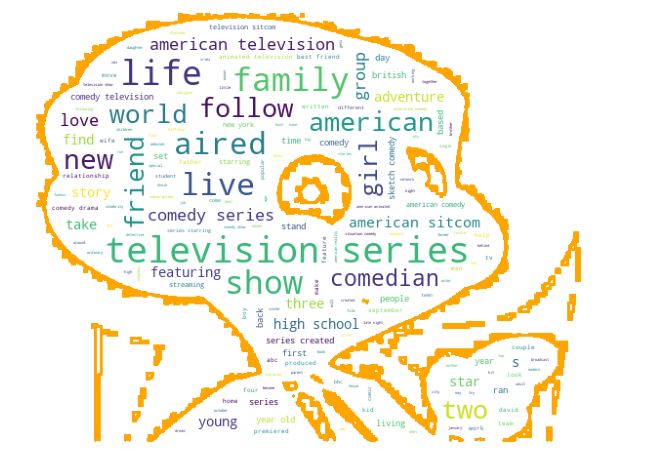

In [40]:
response = requests.get('https://cached.imagescaler.hbpl.co.uk/resize/scaleWidth/815/cached.offlinehbpl.hbpl.co.uk/news/OMC/mrbeanthumb-20170717092605928.jpg')
img = Image.open(BytesIO(response.content))
generateWordCloud('Comedy',mask = np.asarray(img))

### Documentary

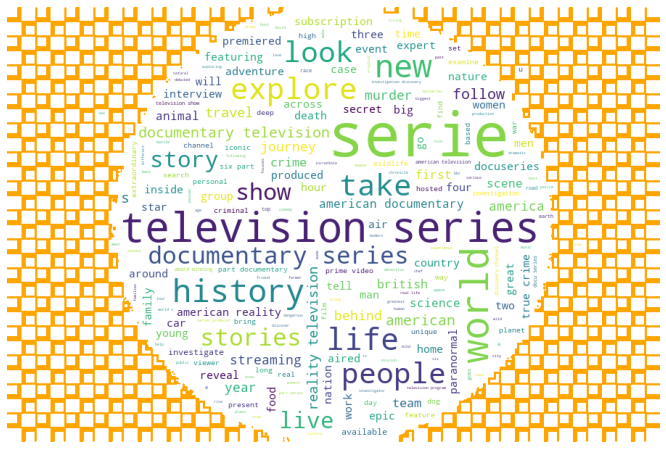

In [41]:
response = requests.get('https://banner2.cleanpng.com/20180217/jde/kisspng-earth-clip-art-internet-animation-cliparts-5a88c5d9c593d5.2603841115189129858093.jpg')
img = Image.open(BytesIO(response.content))
generateWordCloud('Documentary',mask = np.asarray(img))

### Drama

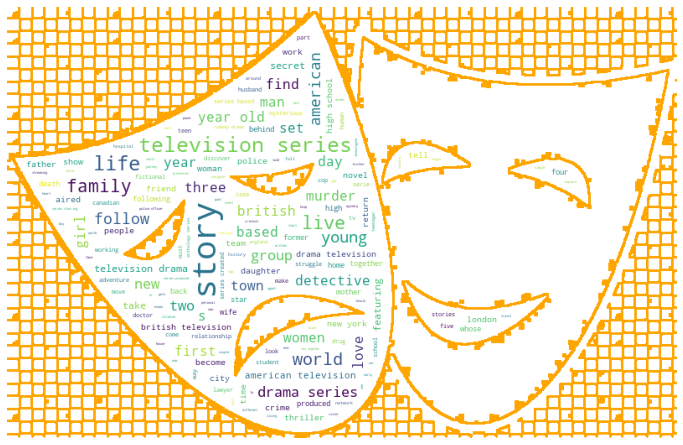

In [42]:
response = requests.get('https://i7.pngguru.com/preview/544/942/462/drama-theatre-comedy-tragedy-mask-actor.jpg')
img = Image.open(BytesIO(response.content))
generateWordCloud('Drama',mask = np.asarray(img))

### Reality

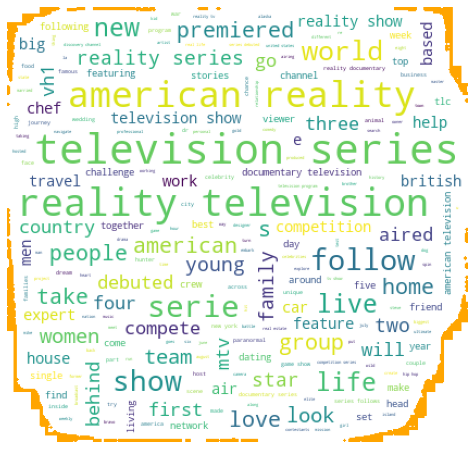

In [43]:
response = requests.get('http://clipart-library.com/img/865458.jpg')
img = Image.open(BytesIO(response.content))
generateWordCloud('Reality',mask = np.asarray(img))

# Les sérieux les mieux notés

In [44]:
fig = plt.subplots.make_subplots(rows = 3, cols = 2, specs = [[{"type":"table"}] * 2]*3,
                                subplot_titles = major_platforms,
                                horizontal_spacing=0.03,
                                vertical_spacing=0.05)
for i, platform in enumerate(major_platforms):
    df = webSeries[webSeries[platform] == 1].sort_values(by = 'R Rating', ascending = False)
    trace = go.Table(header = dict(values = ['<b>Series Title</b>','<b>R Rating</b>']), cells = dict(values = [df['Series Title'][:3], df['R Rating'][:3]]))
    fig.add_trace(trace, row = (i//2)+1 , col = (i%2)+1)
fig.update_layout(height = 550,margin=dict(l=80, r=80, t=100, b=20),
                  title = { 'text' : '<b>Les 3 meilleures séries notées par Rotten Tomatoes sur les principaux services de streaming</b>', 'x' : 0.5},)
fig.show()

In [45]:
fig = plt.subplots.make_subplots(rows = 3, cols = 2, specs = [[{"type":"table"}] * 2]*3,
                                subplot_titles = ['Action & Adventure', 'Animation', 'Comedy', 'Documentary','Drama','Reality'],
                                horizontal_spacing=0.03,
                                vertical_spacing=0.1)
for i, genre in enumerate(major_genres):
    df = webSeries[webSeries[genre] == 1].sort_values(by = 'R Rating', ascending = False)
    trace = go.Table(header = dict(values = ['<b>Series Title</b>','<b>R Rating</b>']), cells = dict(values = [df['Series Title'][:3], df['R Rating'][:3]]))
    fig.add_trace(trace, row = (i//2)+1 , col = (i%2)+1)
fig.update_layout(height = 500,margin=dict(l=80, r=80, t=100, b=20),
                  title = { 'text' : '<b>Les 3 séries les mieux notées par Rotten Tomatoes pour les principaux genres</b>', 'x' : 0.5},)
fig.show()